<a href="https://colab.research.google.com/github/dourivaljunior/arquivos/blob/main/workshop_the_loan_prediction_problem_machine_learning_algorit_reg_log_rand_for.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Início da 2a etapa: 
Importação de Bibliotecas e Arquivo


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from google.colab import files 
uploaded = files.upload()

Saving loan_prediction_dados_processados.csv to loan_prediction_dados_processados (1).csv


In [51]:
df = pd.read_csv('loan_prediction_dados_processados.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    float64
 1   Married           614 non-null    float64
 2   Dependents        614 non-null    float64
 3   Education         614 non-null    float64
 4   Self_Employed     614 non-null    float64
 5   ApplicantIncome   614 non-null    float64
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    float64
 10  Loan_Status       614 non-null    float64
dtypes: float64(11)
memory usage: 52.9 KB


# Revendo a variável Credit_History.

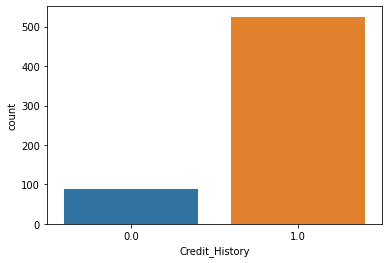

In [104]:
sns.countplot(df['Credit_History'])
plt.show()

#Gerando os conjuntos de treino e de teste

Colunas: 

Variáveis dependentes (x):

'Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
         'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'.

Variável independente (target variable) (y):

Loan_Status.

In [53]:
columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
         'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

#Separando o dataframe em dois conjuntos; 430 dados para treino e 184 dados para o teste.

In [54]:
data_train=df[0:430]      
data_test=df[430:614]

Separando os conjuntos de teste x e y.

In [55]:
x_test=(data_test[columns])
y_test=(data_test['Loan_Status'])

# Realizando o balanceamento das classes da varíavel 'Credit_History'.
Verificando quantos dados são 0 e quantos são 1 na coluna.

In [56]:
from sklearn.utils import resample
data_train_classe_minoritaria=data_train[data_train.Credit_History==0]
data_train_classe_majoritaria=data_train[data_train.Credit_History==1]
num=len(data_train_classe_majoritaria)
print(data_train_classe_minoritaria.shape,data_train_classe_majoritaria.shape)

(59, 11) (371, 11)


aplicando a técnica do resample.

In [57]:
data_train_classe_minoritaria_upsampled=resample(data_train_classe_minoritaria,replace = True,n_samples =num,)

Concatenando as duas classes num novo dataframe.

Gerando um novo dataframe agora balanceado.


In [58]:
data_train_balanceados = pd.concat([data_train_classe_majoritaria,data_train_classe_minoritaria_upsampled])

Verificando o gráfico.

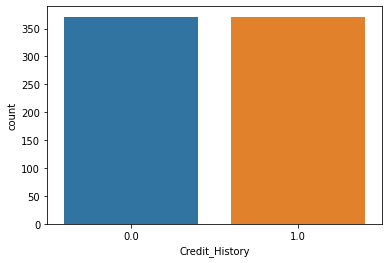

In [105]:
sns.countplot(data_train_balanceados['Credit_History'])
plt.show()

Gerando os conjuntos de treino x e y.

In [60]:
x_train=data_train_balanceados[columns]
y_train=data_train_balanceados['Loan_Status']

# Implementando o modelo de regressão logística

Realizando o treino do modelo com o algoritmo de regressão logística.

In [61]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

Realizando o teste.

In [62]:
from sklearn.metrics import accuracy_score
predict1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test, predict1) * 100
print ("A acurácia na média para o conjunto de 184 dados foi de {:.2f}%.".format(accuracy1))

A acurácia na média para o conjunto de 184 dados foi de 81.52%.


Realizando um teste com um novo dado.

In [106]:
new_data1 = [[0.0,0.0,0.0,1.0,0.0,0.58,0.61,0.74,1.0,1.0]]  
new_data2 = [[0.0,1.0,0.33,1.0,0.0,0.54,0.60,0.74,0.0,0.0]]  
Faz_Prev = model1.predict(new_data1)
Prob=(model1.predict_proba(new_data1))*100
if Faz_Prev==0:
    print('Empréstimo Negado,  probabilidade de ',Prob)
else:
    print('Empréstimo Concedido, probabilidade de ',Prob)


Empréstimo Concedido, probabilidade de  [[17.65259904 82.34740096]]


# Outro algoritmo de machine learning: Random Forest.

In [101]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=10,max_depth=5)
model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [102]:
from sklearn.metrics import accuracy_score
predict2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test, predict2) * 100
print ("A acurácia na média para o conjunto de 184 dados foi de {:.2f}%.".format(accuracy2))

A acurácia na média para o conjunto de 184 dados foi de 78.80%.


# Importância das Variáveis.
(Feature Importances)

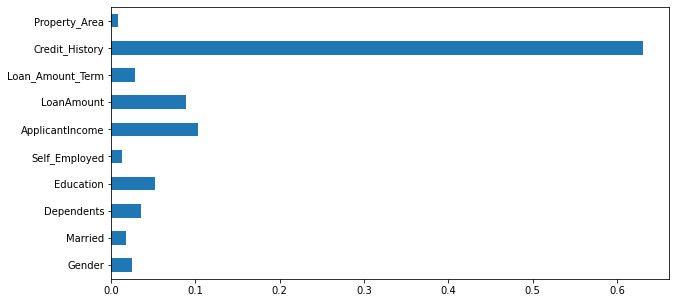

In [107]:
imp_var=df.drop('Loan_Status',axis=1)
importances=pd.Series(model2.feature_importances_, index=imp_var.columns)
importances.plot(kind='barh',figsize=(10,5))

# FIM